In [259]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

In [260]:
# Lista de dicionários para armazenar as métricas
metricas = []

for pSize in range(1, 51):
    for interation in range(10):
        name_image = 'Kodak01'
        valor_psnr = random.uniform(0, 50)  # Substitua obter_valor_psnr(pSize) pelo código para obter o valor do PSNR para pSize
        valor_ssim = random.uniform(0, 40)  # Substitua obter_valor_ssim(pSize) pelo código para obter o valor do SSIM para pSize
        valor_vif = random.uniform(0, 100)    # Substitua obter_valor_vif(pSize) pelo código para obter o valor do VIF para pSize

        metrica = {'pSize': pSize, 'psnr': valor_psnr, 'ssim': valor_ssim, 'vif': valor_vif}
        metricas.append(metrica)
        
        # Gravar os dados no arquivo de texto
        with open(f'./metricas_txts/metricas_fake_{name_image}.txt', 'w') as arquivo:
            for metrica in metricas:
                linha = f"pSize: {metrica['pSize']}, PSNR: {metrica['psnr']}, SSIM: {metrica['ssim']}, VIF: {metrica['vif']}\n"
                arquivo.write(linha)


In [261]:
# Criação do DataFrame
df = pd.DataFrame(metricas)


In [262]:
df.head(10)

,pSize,psnr,ssim,vif
0,1,46.421483,38.284454,81.027796
1,2,33.314120,23.718441,17.558624
2,3,33.724654,19.796155,83.844911
3,4,27.794230,15.852751,64.043572
4,5,0.395805,39.689976,7.995318
5,6,33.698658,0.179672,31.003267
6,7,48.946210,3.463111,61.404083
7,8,7.644429,27.016797,31.326832
8,9,38.336767,34.208870,10.929672
9,10,39.753850,30.611932,53.553671


In [263]:
# inverter linhas e colunas
new_df = df.T
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
pSize,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,...,41.000000,42.000000,43.000000,44.000000,45.000000,46.000000,47.000000,48.000000,49.000000,50.000000
psnr,46.421483,33.314120,33.724654,27.794230,0.395805,33.698658,48.946210,7.644429,38.336767,39.753850,...,28.858564,9.301289,6.931039,0.721937,20.823903,22.148184,49.353124,13.325239,39.444888,28.120059
ssim,38.284454,23.718441,19.796155,15.852751,39.689976,0.179672,3.463111,27.016797,34.208870,30.611932,...,18.048090,38.472998,8.159375,4.528334,35.236953,7.254151,10.680767,30.772205,11.779042,13.043567
vif,81.027796,17.558624,83.844911,64.043572,7.995318,31.003267,61.404083,31.326832,10.929672,53.553671,...,31.869806,83.386663,31.781483,94.468193,32.177687,4.261263,34.462870,96.671784,75.244483,35.324675


In [264]:
# mostrar somente as colunas 5, 10, 20, 30 e 50
df_2 = new_df[[4, 9, 19, 29, 49]]
df_2.columns = ['5', '10', '20', '30', '50'] # alterar o nome das colunas
df_2.head()


,5,10,20,30,50
pSize,5.000000,10.000000,20.000000,30.000000,50.000000
psnr,0.395805,39.753850,19.531914,20.549075,28.120059
ssim,39.689976,30.611932,2.100861,13.859752,13.043567
vif,7.995318,53.553671,3.789797,29.449614,35.324675


In [265]:
# mostrar somente os valores de PSNR
df_2.loc['psnr']

5      0.395805
10    39.753850
20    19.531914
30    20.549075
50    28.120059
Name: psnr, dtype: float64

In [266]:
# Definindo 'pSize' como o índice
df.set_index('pSize', inplace=True)


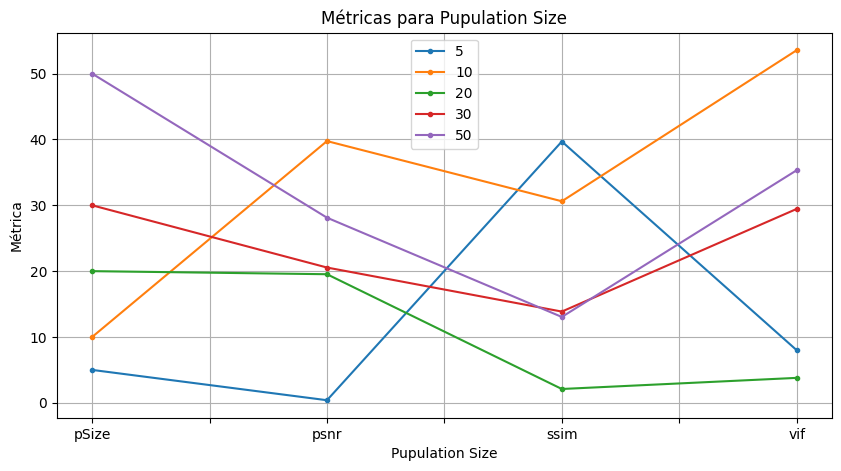

In [267]:
# plotar o gráfico
df_2.plot(figsize=(10, 5), grid=True, style='.-')
plt.xlabel('Pupulation Size')
plt.ylabel('Métrica')
plt.title('Métricas para Pupulation Size')
plt.show()

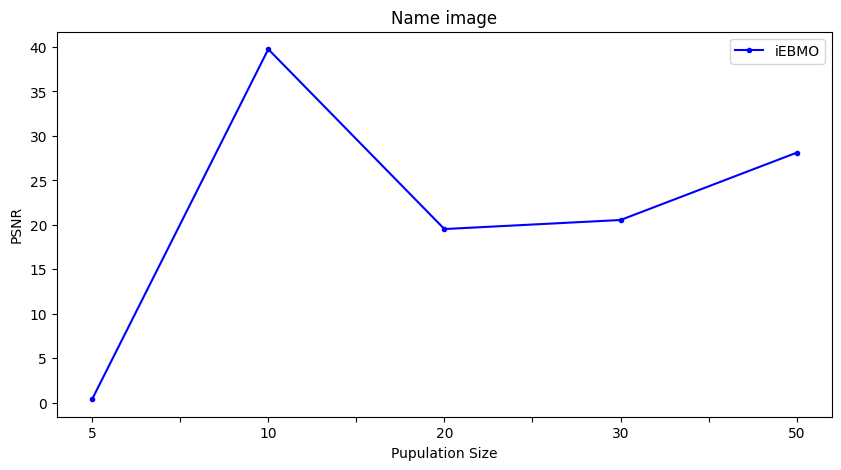

In [268]:
# plotar o gráfico somente do PSNR

df_2.loc['psnr'].plot(figsize=(10, 5), style='.-', color='blue')
plt.xlabel('Pupulation Size')
plt.ylabel('PSNR')
plt.title('Name image')
plt.legend(['iEBMO'])
plt.show()

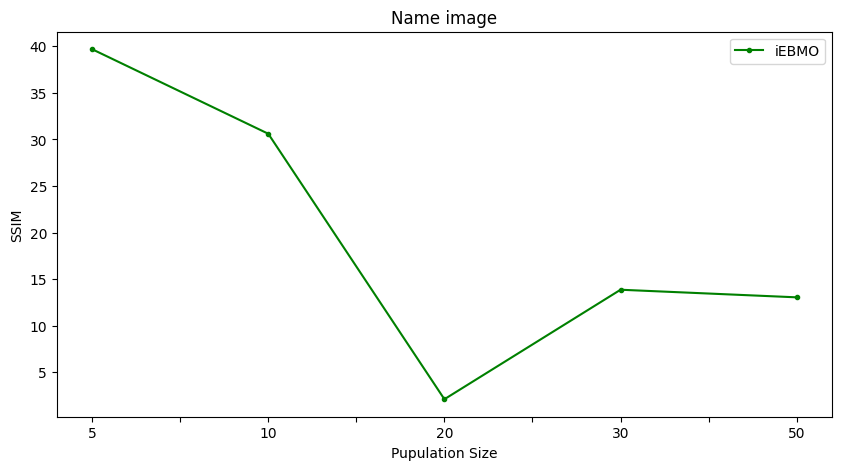

In [269]:
# plotar grafico somente do SSIM
# plotar o gráfico somente do PSNR

df_2.loc['ssim'].plot(figsize=(10, 5), style='.-', color='green')
plt.xlabel('Pupulation Size')
plt.ylabel('SSIM')
plt.title('Name image')
plt.legend(['iEBMO'])
plt.show()

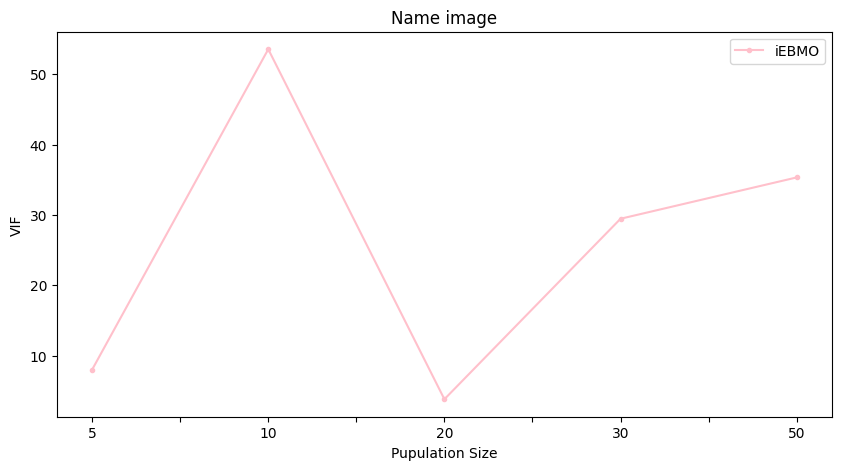

In [270]:
# plotar grafico somente do VIF
# plotar o gráfico somente do PSNR

df_2.loc['vif'].plot(figsize=(10, 5), style='.-', color='pink')
plt.xlabel('Pupulation Size')
plt.ylabel('VIF')
plt.title('Name image')
plt.legend(['iEBMO'])
plt.show()

In [271]:
# Salvando o DataFrame em um arquivo CSV
df.to_csv('metricas_fake.csv')
